### PCA

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as scio

In [82]:
train_data = scio.loadmat("./ex7data1.mat")
# print(train_data)
X = train_data['X']
print(X.shape)

(50, 2)


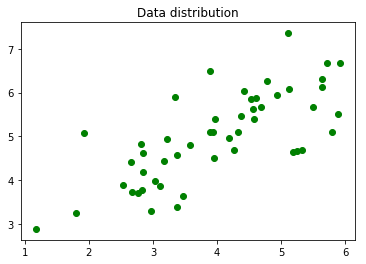

In [71]:
fig = plt.figure()  
ax1 = fig.add_subplot(1, 1, 1)  

ax1.set_title('Data distribution')  
plt.xlabel('')   
plt.ylabel('') 

plt.scatter(X[:,0], X[:,1], color='green', marker='o')

plt.show()

In [83]:
def normalize(X):
    return X - np.mean(X, axis=0)

def pca(X, k):
    # Covarriance matrix
    Sigma = X.T.dot(X) / len(X)
#     print('Sigma: ', Sigma)
    U, S, V = np.linalg.svd(Sigma)
#     print(S)
    Z = X.dot(U[:,:k])
# print(Z[0])
    X_approx = Z.dot(U[:,:k].T)
# print(X_approx[0])
    return X_approx

X = normalize(X)
X_approx = pca(X, 1)
print(X_approx[0])

[-1.15267321 -0.95793728]


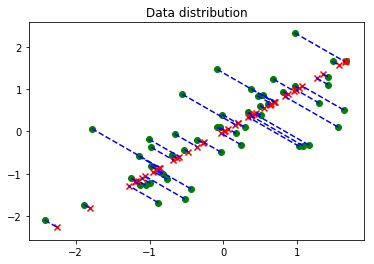

In [75]:
fig = plt.figure()  
ax1 = fig.add_subplot(1, 1, 1)  

ax1.set_title('Data distribution')  
plt.xlabel('')   
plt.ylabel('') 

plt.scatter(X[:,0], X[:,1], color='green', marker='o')
plt.scatter(X_approx[:,0], X_approx[:, 1], color='red', marker='x')
plt.plot([X[:,0], X_approx[:,0]], [X[:,1], X_approx[:,1]], linestyle='--', color='blue')

plt.show()

### Face Image Dataset

In [78]:
from PIL import Image

train_data = scio.loadmat("./ex7faces.mat")
X = train_data['X']
print(X.shape)


(5000, 1024)


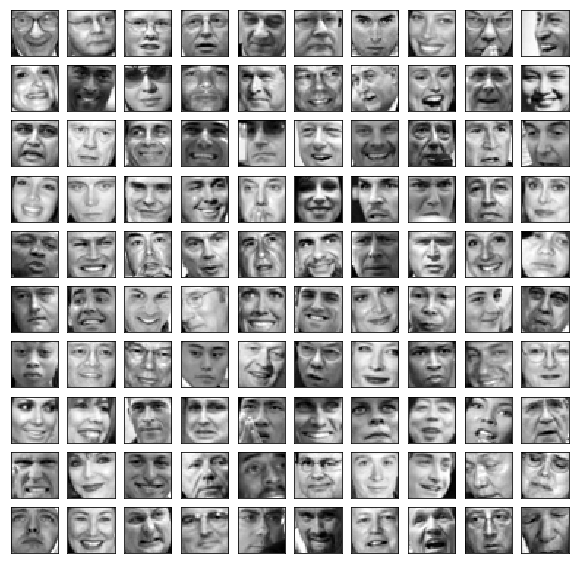

In [66]:
fig = plt.figure(figsize=(10, 10))  

X = X[:100,:]
SIZE = 10
fig, ax_array = plt.subplots(SIZE, SIZE, sharey=True, sharex=True, figsize=(SIZE, SIZE))
for i in range(0, SIZE):
    for j in range(0, SIZE):
        arr = X[i * SIZE + j].reshape((32, 32), order='F')
        ax_array[i, j].matshow(arr, cmap=plt.cm.gray)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
plt.show()

In [79]:
X = normalize(X)
X_approx = pca(X, 100)
print(X_approx.shape)


[5.11461944e+05 2.31533894e+05 1.11985108e+05 ... 3.45447440e-01
 3.26083886e-01 3.14703280e-01]
(5000, 1024)


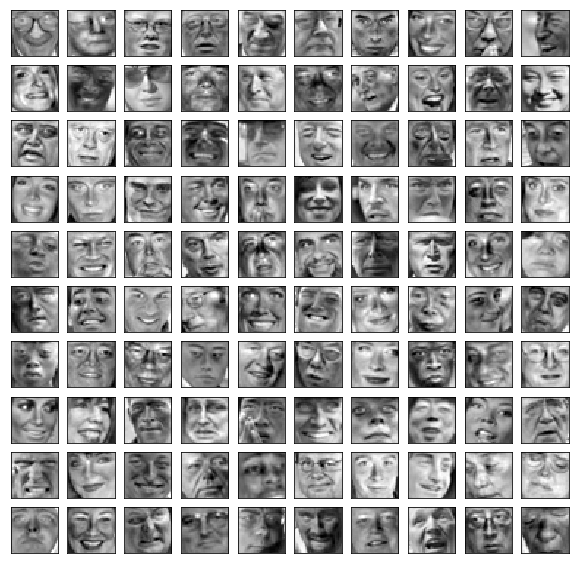

In [68]:
fig = plt.figure(figsize=(10, 10))  

SIZE = 10
fig, ax_array = plt.subplots(SIZE, SIZE, sharey=True, sharex=True, figsize=(SIZE, SIZE))
for i in range(0, SIZE):
    for j in range(0, SIZE):
        arr = X_approx[i * SIZE + j].reshape((32, 32), order='F')
        ax_array[i, j].matshow(arr, cmap=plt.cm.gray)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
plt.show()